# Question 1

#### Derive the update rule and show how to train a 2-layer (1 hidden layer and 1 output layer) neural network with backpropagation for regression using the Mean Square Error loss. Assume that you are using the Sigmoid activation function for the hidden layer. Explain briefly how this is different from the update rule for the network trained for binary classification using log loss.

Let $x$ and $\hat{y}$ be the input features and network output, respectively. Also, let $w_{1}$ and $b_{1}$, and $w_{2}$ and $b^{(2)}$ be the parameters of the hidden and output layer, respectively. 

The hidden layer takes $x$ as input and has output 
$z_{1} = w x + b_{1}$, and $a_{1}= \sigma(z_{1}) = \frac{1}{1 + exp(-z_{1})}$.

The output layer has $a_{1}$ as input and $\hat{y}=w_{2}a_{1} + b_{2}$ as output.

The loss function is given by $\mathcal{L} = \frac{1}{2N}\sum\limits_{k=1}^{N}(y_{k}-\hat{y}_{k})^{2}$, where $N$ is the number of samples.

We used gradient descend to update the parameters:

$dw_{2} = -\alpha\frac{d\mathcal{L}}{dw_{2}} = -\alpha\frac{d\mathcal{L}}{d\hat{y}}\frac{d\hat{y}}{dw_{2}} = \frac{\alpha}{N}\sum\limits_{k}(y_{k}-\hat{y}_{k})a_{1} $

$db_{2} = -\alpha\frac{d\mathcal{L}}{db_{2}} = -\alpha\frac{d\mathcal{L}}{d\hat{y}}\frac{d\hat{y}}{db_{2}} = \frac{\alpha}{N}\sum\limits_{k}(y_{k}-\hat{y}_{k}) $

$dw_{1} = -\alpha\frac{d\mathcal{L}}{dw_{1}} = -\alpha\frac{d\mathcal{L}}{d\hat{y}}\frac{d\hat{y}}{da_{1}}\frac{da_{1}}{dz_{1}}\frac{dz_{1}}{dw_{1}} = \frac{\alpha}{N}\sum\limits_{k}(y_{k}-\hat{y}_{k})w_{2}a_{1}(1-a_{1})x $

$db_{1} = -\alpha\frac{d\mathcal{L}}{db_{1}} = -\alpha\frac{d\mathcal{L}}{d\hat{y}}\frac{d\hat{y}}{da_{1}}\frac{da_{1}}{dz_{1}}\frac{dz_{1}}{db_{1}} = \frac{\alpha}{N}\sum\limits_{k}(y_{k}-\hat{y}_{k})w_{2}a_{1}(1-a_{1}) $

# Question 2

### 1. What is the activation function that you will choose for the output layer?

Since this a regression problem, i.e., the targets are continuous real values, I'll use a linear activation function. 

### 2. How many neurons should there be in the output layer? Why?

One, since the output is only one real value. 

In [589]:
import numpy as np
import matplotlib.pyplot as plt

In [629]:
#activation function
def sigmoid(z):
	return 1/(1 + np.exp(-z))

#derivative of activation function
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [631]:
def structure(X, Y):
    input_size = X.shape[0] # size of input layer
    hidden_size = 50 #hidden layer 
    output_size = Y.shape[0] # size of output layer
    return (input_size, hidden_size, output_size)

X_train = np.loadtxt("content/drive/MyDrive/X_train.csv")
Y_train = np.loadtxt("content/drive/MyDrive/Y_train.csv")

X_train = X_train.T
Y_train = Y_train.reshape(1, Y_train.shape[0])

(input_size, hidden_size, output_size) = structure(X_train, Y_train)

print("The size of the input layer is:  = " + str(input_size))
print("The size of the hidden layer is:  = " + str(hidden_size))
print("The size of the output layer is:  = " + str(output_size))


The size of the input layer is:  = 2
The size of the hidden layer is:  = 50
The size of the output layer is:  = 1


In [632]:
def initialize(input_size, hidden_size, output_size):
    W1 = np.random.rand(hidden_size, input_size)
    b1 = np.random.rand(hidden_size, 1)
    W2 = np.random.rand(output_size, hidden_size)
    b2 = np.random.rand(output_size, 1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [633]:
def forward_pass(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    A2 = np.dot(W2, A1) + b2    
    cache = {"Z1": Z1,"A1": A1,"A2": A2}
    
    return A2, cache

In [634]:
def cost_function(A2, Y, parameters):
    # number of training example
    m = 2*Y.shape[1] 
    # Compute the cost
    predictions = A2
    cost = (1/m) * np.sum(np.square(predictions-Y))
    
    return cost

In [636]:
def backpropagation(parameters, cache, X, Y):
    #number of training example
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
   
    dZ2 = Y-A2
    dW2 = -(1/m) * np.dot(dZ2, A1.T)
    db2 = -(1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * sigmoid_prime(A2)
    dW1 = -(1/m) * np.dot(dZ1, X.T) 
    db1 = -(1/m)*np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    
    return grads

In [638]:
def gradient_descent(parameters, grads, alpha = 0.01):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']    
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    
    return parameters

In [639]:
def NN(X, Y, hidden_size, ite = 1000):
    input_size = define_structure(X, Y)[0]
    output_size = define_structure(X, Y)[2]
    
    parameters = initialize(input_size, hidden_size, output_size)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, ite):
        A2, cache = forward_pass(X, parameters)
        cost = cost_function(A2, Y, parameters)
        grads = backpropagation(parameters, cache, X, Y)
        parameters = gradient_descent(parameters, grads)
        if i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))    
    return parameters

In [640]:
parameters = neural_network_model(X_train, Y_train, 50, num_iterations=10000)

Cost after iteration 0: 2666.835485
Cost after iteration 10: 2526.501721
Cost after iteration 20: 2414.458076
Cost after iteration 30: 2225.164650
Cost after iteration 40: 1748.305792
Cost after iteration 50: 1300.655232
Cost after iteration 60: 996.999335
Cost after iteration 70: 754.666774
Cost after iteration 80: 590.750459
Cost after iteration 90: 467.072901
Cost after iteration 100: 369.189012
Cost after iteration 110: 295.872834
Cost after iteration 120: 241.236009
Cost after iteration 130: 199.884973
Cost after iteration 140: 168.372150
Cost after iteration 150: 144.229158
Cost after iteration 160: 125.664160
Cost after iteration 170: 111.360904
Cost after iteration 180: 100.332162
Cost after iteration 190: 91.819279
Cost after iteration 200: 85.231151
Cost after iteration 210: 80.109391
Cost after iteration 220: 76.103671
Cost after iteration 230: 72.949461
Cost after iteration 240: 70.448012
Cost after iteration 250: 68.449893
Cost after iteration 260: 66.842301
Cost after ite

Cost after iteration 3880: 53.061304
Cost after iteration 3890: 53.045196
Cost after iteration 3900: 53.029095
Cost after iteration 3910: 53.013000
Cost after iteration 3920: 52.996912
Cost after iteration 3930: 52.980830
Cost after iteration 3940: 52.964753
Cost after iteration 3950: 52.948683
Cost after iteration 3960: 52.932618
Cost after iteration 3970: 52.916557
Cost after iteration 3980: 52.900502
Cost after iteration 3990: 52.884452
Cost after iteration 4000: 52.868405
Cost after iteration 4010: 52.852363
Cost after iteration 4020: 52.836325
Cost after iteration 4030: 52.820291
Cost after iteration 4040: 52.804260
Cost after iteration 4050: 52.788232
Cost after iteration 4060: 52.772208
Cost after iteration 4070: 52.756186
Cost after iteration 4080: 52.740167
Cost after iteration 4090: 52.724151
Cost after iteration 4100: 52.708137
Cost after iteration 4110: 52.692124
Cost after iteration 4120: 52.676114
Cost after iteration 4130: 52.660106
Cost after iteration 4140: 52.644099
C

Cost after iteration 7730: 46.799477
Cost after iteration 7740: 46.783469
Cost after iteration 7750: 46.767465
Cost after iteration 7760: 46.751467
Cost after iteration 7770: 46.735474
Cost after iteration 7780: 46.719487
Cost after iteration 7790: 46.703504
Cost after iteration 7800: 46.687527
Cost after iteration 7810: 46.671555
Cost after iteration 7820: 46.655588
Cost after iteration 7830: 46.639626
Cost after iteration 7840: 46.623670
Cost after iteration 7850: 46.607719
Cost after iteration 7860: 46.591773
Cost after iteration 7870: 46.575832
Cost after iteration 7880: 46.559897
Cost after iteration 7890: 46.543967
Cost after iteration 7900: 46.528043
Cost after iteration 7910: 46.512124
Cost after iteration 7920: 46.496210
Cost after iteration 7930: 46.480302
Cost after iteration 7940: 46.464400
Cost after iteration 7950: 46.448502
Cost after iteration 7960: 46.432610
Cost after iteration 7970: 46.416724
Cost after iteration 7980: 46.400843
Cost after iteration 7990: 46.384968
C

In [642]:
def prediction(parameters, X):
    A2, cache = forward_pass(X, parameters)
    predictions = A2
    
    return predictions

In [643]:
X_test = np.loadtxt("content/drive/MyDrive/X_test.csv")
Y_test = np.loadtxt("content/drive/MyDrive/Y_test.csv")

print(Y_test)

X_test = X_test.T
Y_test = Y_test.reshape(1, Y_test.shape[0])

predictions = prediction(parameters, X_test)

n = np.size(Y_test)
error = np.sum(np.square(Y_test - predictions))/n
print("MSE = ",error)

Y_test = Y_test.reshape(n,1)
predictions = predictions.reshape(n,1)


[ 4.85685732e+01  1.32234717e+02  2.29901026e+01 -7.47753055e+01
  3.36108471e+01 -2.85802221e+01  9.46364820e+01  9.78061100e+01
  1.16735079e+01  2.05402491e+01  1.54433099e+01  5.87962885e+01
 -1.07826074e+01 -5.69290564e+01 -2.85037807e+01 -3.45123172e+01
  9.19207765e+01  6.68377502e+01 -1.78674535e+02 -1.48798260e+02
 -5.24894636e+01  1.73409123e+02  8.62951539e+01  6.04152404e+01
 -2.88636343e+01  1.75475713e+01  3.01054374e+01 -7.34555216e+01
  8.30113424e+01  2.30490704e+01 -1.27808298e+02  1.99847311e+01
  1.37621539e+02 -1.15896459e+02 -1.37558755e-01  4.69375317e+01
 -2.68960199e+01 -4.09035391e+01 -1.02666751e+02  8.97887978e+01
  4.63058398e+01  6.25502073e+01  4.30451350e+01  3.58348590e+01
 -3.10150465e+01  2.50282876e+01  3.37658840e+01  1.05592315e+02
  7.60200298e+00 -6.91040817e+01]
MSE =  113.08501779694878


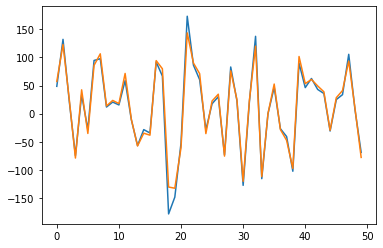

In [646]:
plt.plot(np.arange(n),Y_test)
plt.plot(np.arange(n),predictions)

Text(0.5, 0, 'prediction y')

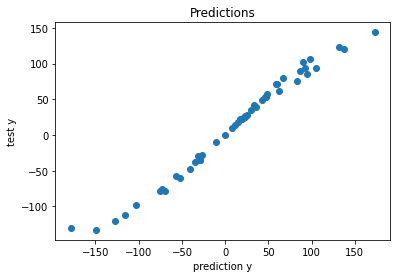

In [648]:
plt.scatter(Y_test,predictions)
plt.title("Predictions")
plt.ylabel("test y")
plt.xlabel("prediction y")

### What is the effect of the learning rate on the training process? 



### What is the effect of the number of neurons in the hidden layer?

There is no need to change the update rules. Changing the number of neurons only changes the dimensions of the parameters in the layers, but the update rules are the same.

### What is the effect of the activation functions in the network? Explore two different activation functions other than sigmoid such as tanh, linear, or ReLU.

In this case we don't need to change the update rule, but the derivatives have to be adapted to include the change of activation funtion.